In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [3]:
df = df.drop(['AverageTemperatureUncertainty', 'Latitude', 'Longitude'], axis=1)
df

,dt,AverageTemperature,City,Country
0,1849-01-01,26.704,Abidjan,Côte D'Ivoire
1,1849-02-01,27.434,Abidjan,Côte D'Ivoire
2,1849-03-01,28.101,Abidjan,Côte D'Ivoire
3,1849-04-01,26.140,Abidjan,Côte D'Ivoire
4,1849-05-01,25.427,Abidjan,Côte D'Ivoire
...,...,...,...,...
239172,2013-05-01,18.979,Xian,China
239173,2013-06-01,23.522,Xian,China
239174,2013-07-01,25.251,Xian,China
239175,2013-08-01,24.528,Xian,China


In [4]:
# unique countries

df.Country.unique()

array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Thailand', 'Brazil', 'Germany', 'Colombia',
       'South Africa', 'Morocco', 'China', 'United States', 'Senegal',
       'Tanzania', 'Bangladesh', 'Pakistan', 'Zimbabwe', 'Vietnam',
       'Nigeria', 'Indonesia', 'Saudi Arabia', 'Afghanistan', 'Ukraine',
       'Congo (Democratic Republic Of The)', 'Peru', 'United Kingdom',
       'Angola', 'Spain', 'Philippines', 'Iran', 'Australia', 'Mexico',
       'Somalia', 'Canada', 'Russia', 'Japan', 'Kenya', 'France', 'Burma',
       'Italy', 'Chile', 'Dominican Republic', 'South Korea', 'Singapore',
       'Taiwan', 'Sudan'], dtype=object)

In [10]:
df['dt'] = pd.to_datetime(df.dt, format = '%Y-%m-%d')
df.head()

,dt,AverageTemperature,City,Country
0,1849-01-01,26.704,Abidjan,Côte D'Ivoire
1,1849-02-01,27.434,Abidjan,Côte D'Ivoire
2,1849-03-01,28.101,Abidjan,Côte D'Ivoire
3,1849-04-01,26.140,Abidjan,Côte D'Ivoire
4,1849-05-01,25.427,Abidjan,Côte D'Ivoire


In [11]:
df['month'] = df.dt.dt.month
df.head()

,dt,AverageTemperature,City,Country,month
0,1849-01-01,26.704,Abidjan,Côte D'Ivoire,1
1,1849-02-01,27.434,Abidjan,Côte D'Ivoire,2
2,1849-03-01,28.101,Abidjan,Côte D'Ivoire,3
3,1849-04-01,26.140,Abidjan,Côte D'Ivoire,4
4,1849-05-01,25.427,Abidjan,Côte D'Ivoire,5


In [24]:
df['year'] = df.dt.dt.year
df.head()

,dt,AverageTemperature,City,Country,month,year
0,1849-01-01,26.704,Abidjan,Côte D'Ivoire,1,1849
1,1849-02-01,27.434,Abidjan,Côte D'Ivoire,2,1849
2,1849-03-01,28.101,Abidjan,Côte D'Ivoire,3,1849
3,1849-04-01,26.140,Abidjan,Côte D'Ivoire,4,1849
4,1849-05-01,25.427,Abidjan,Côte D'Ivoire,5,1849


In [36]:
india = df[df.Country == 'India']
india = india.drop('Country', axis=1)
india = india[india['year'] >= 1900]
india

,dt,AverageTemperature,City,month,year
5190,1900-01-01,18.814,Ahmadabad,1,1900
5191,1900-02-01,22.210,Ahmadabad,2,1900
5192,1900-03-01,27.790,Ahmadabad,3,1900
5193,1900-04-01,30.873,Ahmadabad,4,1900
5194,1900-05-01,32.646,Ahmadabad,5,1900
...,...,...,...,...,...
216560,2013-05-01,32.980,Surat,5,2013
216561,2013-06-01,29.418,Surat,6,2013
216562,2013-07-01,27.306,Surat,7,2013
216563,2013-08-01,27.187,Surat,8,2013


In [37]:
india.City.value_counts()

Hyderabad    1365
Bangalore    1365
Ahmadabad    1365
Kanpur       1365
Calcutta     1365
New Delhi    1365
Bombay       1365
Pune         1365
Jaipur       1365
Madras       1365
Nagpur       1365
Delhi        1365
Lakhnau      1365
Surat        1365
Name: City, dtype: int64

Comparing major cities of India over the years

In [38]:
graph = india.groupby(['City','year'])['AverageTemperature'].mean().reset_index()
graph

,City,year,AverageTemperature
0,Ahmadabad,1900,26.902667
1,Ahmadabad,1901,26.831500
2,Ahmadabad,1902,27.295833
3,Ahmadabad,1903,26.276000
4,Ahmadabad,1904,26.622250
...,...,...,...
1591,Surat,2009,27.819833
1592,Surat,2010,27.681667
1593,Surat,2011,27.016583
1594,Surat,2012,26.889250


In [39]:
graph = graph.pivot('year','City','AverageTemperature').fillna(0)
graph

City,Ahmadabad,Bangalore,Bombay,Calcutta,Delhi,Hyderabad,Jaipur,Kanpur,Lakhnau,Madras,Nagpur,New Delhi,Pune,Surat
year,,,,,,,,,,,,,,
1900,26.902667,25.439000,27.001083,26.404167,25.559667,27.647333,25.819000,25.136667,25.136667,28.887250,26.560750,25.559667,25.287833,26.802667
1901,26.831500,25.089917,26.763083,26.216250,25.493167,27.010250,25.887083,25.020167,25.020167,28.626667,25.782000,25.493167,24.806583,26.550167
1902,27.295833,25.064333,27.297833,26.100083,25.660833,27.383833,26.102083,25.167667,25.167667,28.605833,26.426583,25.660833,25.348167,27.062250
1903,26.276000,24.816000,26.341417,26.175750,25.141000,26.727083,25.241333,24.824000,24.824000,28.231167,25.577417,25.141000,24.408333,26.038417
1904,26.622250,24.530333,26.684917,25.913167,25.068583,26.675000,25.376167,24.558583,24.558583,28.216500,25.525583,25.068583,24.685833,26.383833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,28.095833,25.725750,27.844500,27.153250,26.554250,28.026500,26.919500,25.987083,25.987083,29.417417,27.138917,26.554250,25.868250,27.819833
2010,28.017833,25.705250,27.765417,27.288833,26.520250,27.693417,26.818417,26.021750,26.021750,29.047333,26.927000,26.520250,25.749167,27.681667
2011,27.290417,25.362083,27.384917,26.406917,25.629500,27.408833,25.916500,25.062083,25.062083,29.063167,26.004667,25.629500,25.161417,27.016583


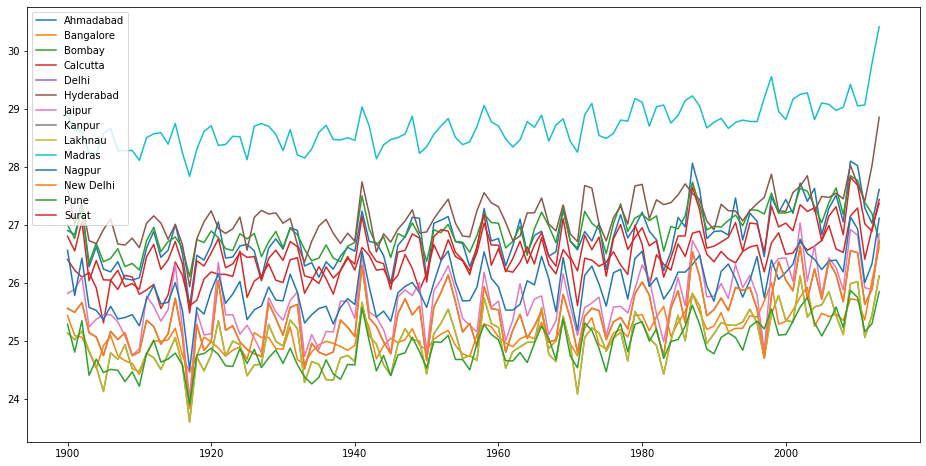

In [45]:
plt.figure(figsize = (16,8))
x = graph.index
for i in graph.columns:
    plt.plot(x, graph[i], label = i)
plt.legend()
plt.show()

1. Madras is found to be the hottest major city in India in the 20th century. Hyderabad is the second hottest.

2. There is a clear upward trend seen in all the major cities. We will now look deeper into Avg Temp of all major cities of India.

3. The average temperatures of the year of all other cities lies in the range 24 degree Celsius to 28 degree celsius

Average Temperature of Major cities in India

In [46]:
india

,dt,AverageTemperature,City,month,year
5190,1900-01-01,18.814,Ahmadabad,1,1900
5191,1900-02-01,22.210,Ahmadabad,2,1900
5192,1900-03-01,27.790,Ahmadabad,3,1900
5193,1900-04-01,30.873,Ahmadabad,4,1900
5194,1900-05-01,32.646,Ahmadabad,5,1900
...,...,...,...,...,...
216560,2013-05-01,32.980,Surat,5,2013
216561,2013-06-01,29.418,Surat,6,2013
216562,2013-07-01,27.306,Surat,7,2013
216563,2013-08-01,27.187,Surat,8,2013


In [51]:
data = india.drop('City', axis=1)
data = data.groupby(['dt', 'month', 'year'])['AverageTemperature'].mean().reset_index()
data

,dt,month,year,AverageTemperature
0,1900-01-01,1,1900,19.350429
1,1900-02-01,2,1900,22.049214
2,1900-03-01,3,1900,27.072214
3,1900-04-01,4,1900,29.774000
4,1900-05-01,5,1900,31.935714
...,...,...,...,...
1360,2013-05-01,5,2013,33.227786
1361,2013-06-01,6,2013,30.324357
1362,2013-07-01,7,2013,28.340786
1363,2013-08-01,8,2013,27.931571


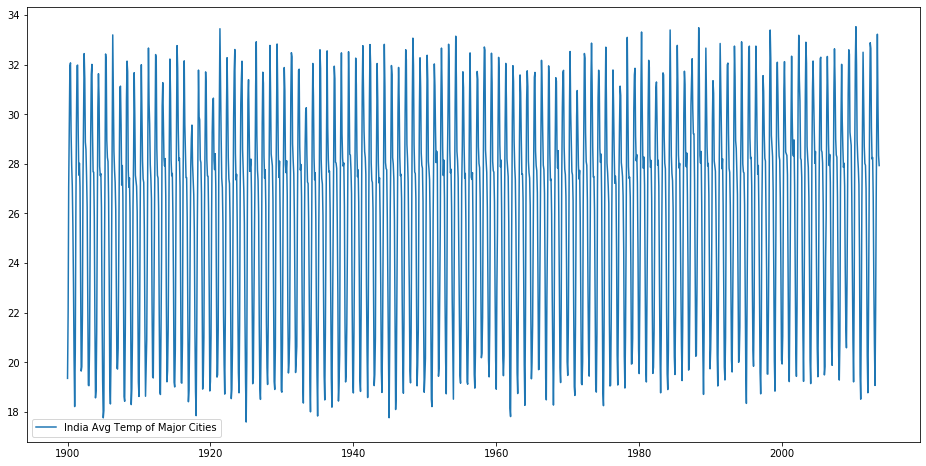

In [52]:
plt.figure(figsize = (16,8))
Y = data['AverageTemperature']
plt.plot(data['dt'], Y, label = 'India Avg Temp of Major Cities')
plt.legend(loc = 'best')

We plotted the data monthwise over here...there is too much noise and a trend cannot be identified...let's try yearwise.

In [54]:
# Let's Look Closely ...yearwise
data2 = data.groupby('year')['AverageTemperature'].mean().reset_index()
data2

,year,AverageTemperature
0,1900,26.296030
1,1901,26.042155
2,1902,26.310274
3,1903,25.697351
4,1904,25.704851
...,...,...
109,2009,27.078030
110,2010,26.984167
111,2011,26.314190
112,2012,26.575881


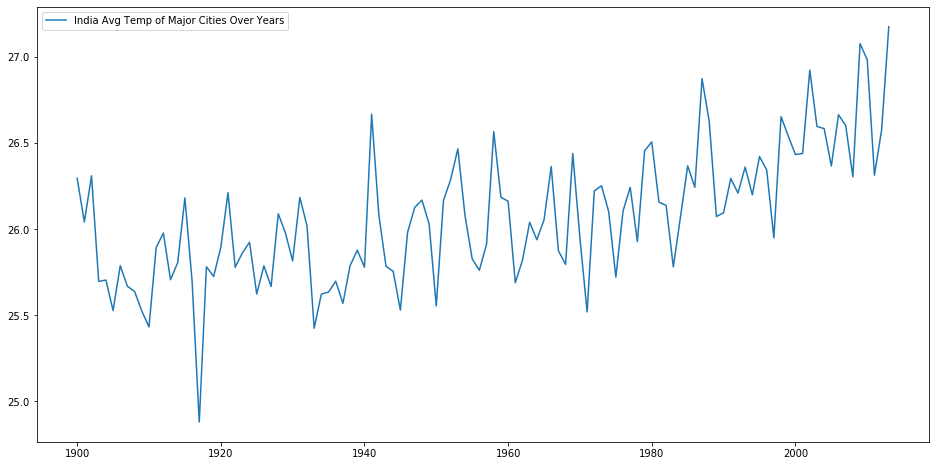

In [56]:
plt.figure(figsize = (16,8))
Y = data2['AverageTemperature']
plt.plot(data2['year'], Y, label = 'India Avg Temp of Major Cities Over Years')
plt.legend(loc = 'best')

Yes!! There is a clear trend seen in this graph. We have just detected Global Warming in Major Cities of India.

There is not much rise in the temperature till about 1990 if you see closely. Post 1990, there is a clear upward trend that is observed. 1991 is when globalization policies were declared and initiated in India. Perhaps the increase in temp after 1990 in the major cities is observed owing to the rapid development of major cities due to Globalization.

A seasonality is not expected though, as this is a graph of Average Temp of each year. And seasonality in temperature variations is of 1 year, not a few years.

In [66]:
data1 = data
data1.index = data1.dt        # monthly data
Y1 = data1['AverageTemperature']
data2.index = data2.year    # yearly data
Y2 = data2['AverageTemperature']

In [73]:
data1

,dt,month,year,AverageTemperature
dt,,,,
1900-01-01,1900-01-01,1,1900,19.350429
1900-02-01,1900-02-01,2,1900,22.049214
1900-03-01,1900-03-01,3,1900,27.072214
1900-04-01,1900-04-01,4,1900,29.774000
1900-05-01,1900-05-01,5,1900,31.935714
...,...,...,...,...
2013-05-01,2013-05-01,5,2013,33.227786
2013-06-01,2013-06-01,6,2013,30.324357
2013-07-01,2013-07-01,7,2013,28.340786


In [139]:
Y1

dt
1900-01-01    19.350429
1900-02-01    22.049214
1900-03-01    27.072214
1900-04-01    29.774000
1900-05-01    31.935714
                ...    
2013-05-01    33.227786
2013-06-01    30.324357
2013-07-01    28.340786
2013-08-01    27.931571
2013-09-01          NaN
Name: AverageTemperature, Length: 1365, dtype: float64

In [95]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(timeseries):
    rolmean = timeseries.rolling(48).mean()
    rolstd = timeseries.rolling(48).std()
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

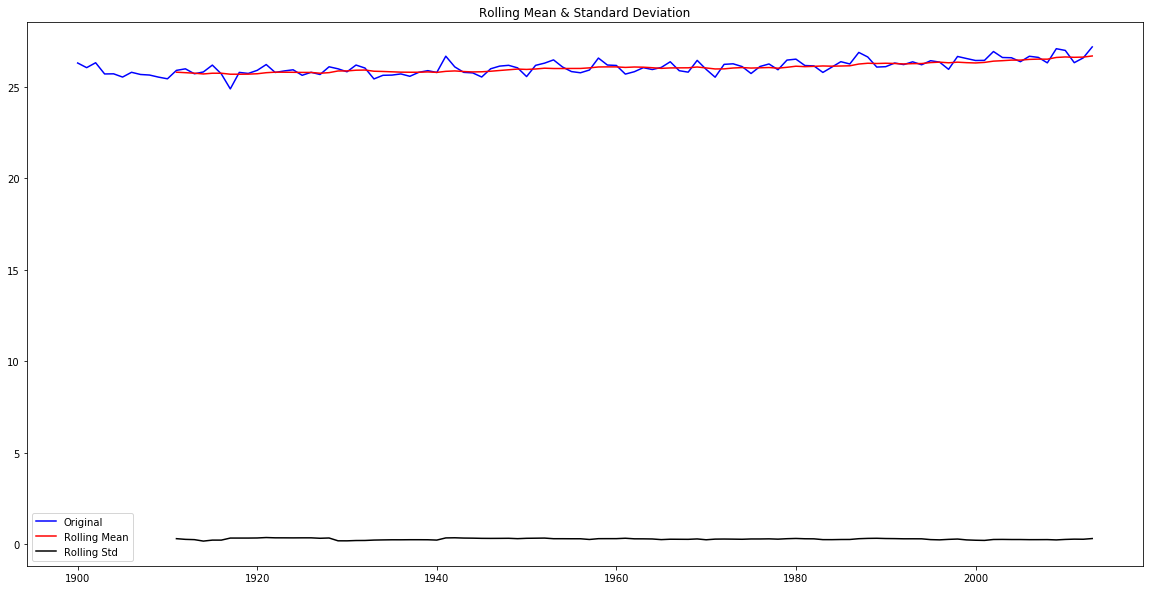

Results of Dickey-Fuller Test:
Test Statistic                   1.032355
p-value                          0.994596
#Lags Used                      10.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64


In [76]:
# Yearwise Data

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
stationarity_check(Y2)

The test Statistic is greater than the Critical value. Global warming trend is hence proved.

Let's apply Holt's Linear Model now to predict yearwise linear rise in temperature after 2013 till 2030.

In [83]:
l = list(range(2014, 2031))
l

[2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2030]

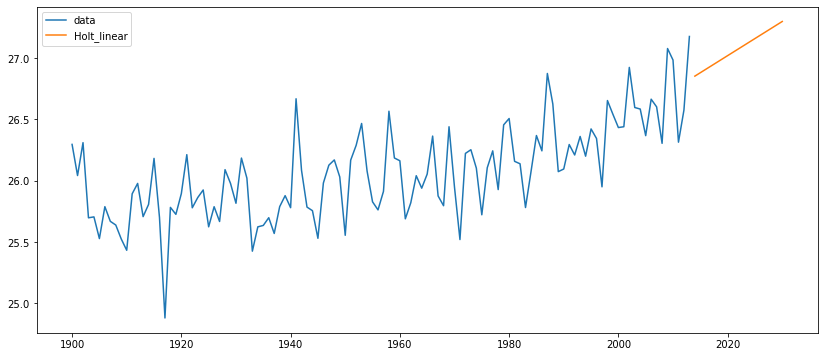

In [86]:
from statsmodels.tsa.api import Holt 

fit1 = Holt(np.asarray(Y2)).fit(smoothing_level=0.3, smoothing_slope=0.1)
d = fit1.forecast(17)
y_hat_avg = pd.DataFrame(data = d, columns = ['Holt_linear'], index = l)

plt.figure(figsize=(14, 6))
plt.plot(Y2, label = 'data')
plt.plot(y_hat_avg['Holt_linear'], label = 'Holt_linear')
plt.legend(loc = 'best')
plt.show()

In [87]:
fit1.forecast(17)

array([26.85285089, 26.88071534, 26.90857978, 26.93644423, 26.96430867,
       26.99217312, 27.02003757, 27.04790201, 27.07576646, 27.10363091,
       27.13149535, 27.1593598 , 27.18722425, 27.21508869, 27.24295314,
       27.27081759, 27.29868203])

As predicted by Holt Linear Model, thse are the values of Avg Temp of Major cities of India from 2014 - 2030; and the linear upward trend is seen in the plotted graph.

Let's now analyze and predict using Monthly data, using the SARIMA Model due to seasonality present.

In [88]:
data1

,dt,month,year,AverageTemperature
dt,,,,
1900-01-01,1900-01-01,1,1900,19.350429
1900-02-01,1900-02-01,2,1900,22.049214
1900-03-01,1900-03-01,3,1900,27.072214
1900-04-01,1900-04-01,4,1900,29.774000
1900-05-01,1900-05-01,5,1900,31.935714
...,...,...,...,...
2013-05-01,2013-05-01,5,2013,33.227786
2013-06-01,2013-06-01,6,2013,30.324357
2013-07-01,2013-07-01,7,2013,28.340786


In [138]:
Y1

dt
1900-01-01    19.350429
1900-02-01    22.049214
1900-03-01    27.072214
1900-04-01    29.774000
1900-05-01    31.935714
                ...    
2013-05-01    33.227786
2013-06-01    30.324357
2013-07-01    28.340786
2013-08-01    27.931571
2013-09-01          NaN
Name: AverageTemperature, Length: 1365, dtype: float64

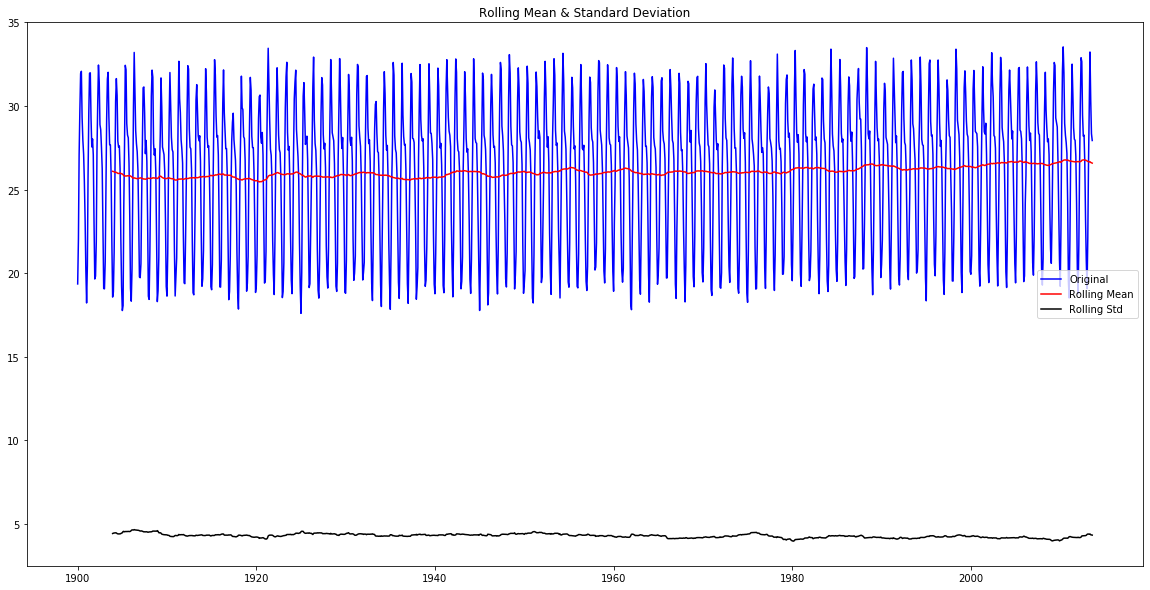

Results of Dickey-Fuller Test:
Test Statistic                   -3.911401
p-value                           0.001953
#Lags Used                       23.000000
Number of Observations Used    1340.000000
Critical Value (1%)              -3.435239
Critical Value (5%)              -2.863699
Critical Value (10%)             -2.567920
dtype: float64


In [96]:
# Monthly Data

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
stationarity_check(Y1.dropna())

The monthly data having much noise is found to have test statistic less than critical value!
However its not very much less, let's apply differencing.

Before that, let's decompose to confirm the trend and seasonality.

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Y1.dropna()).AverageTemperature.values, freq = 12) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid

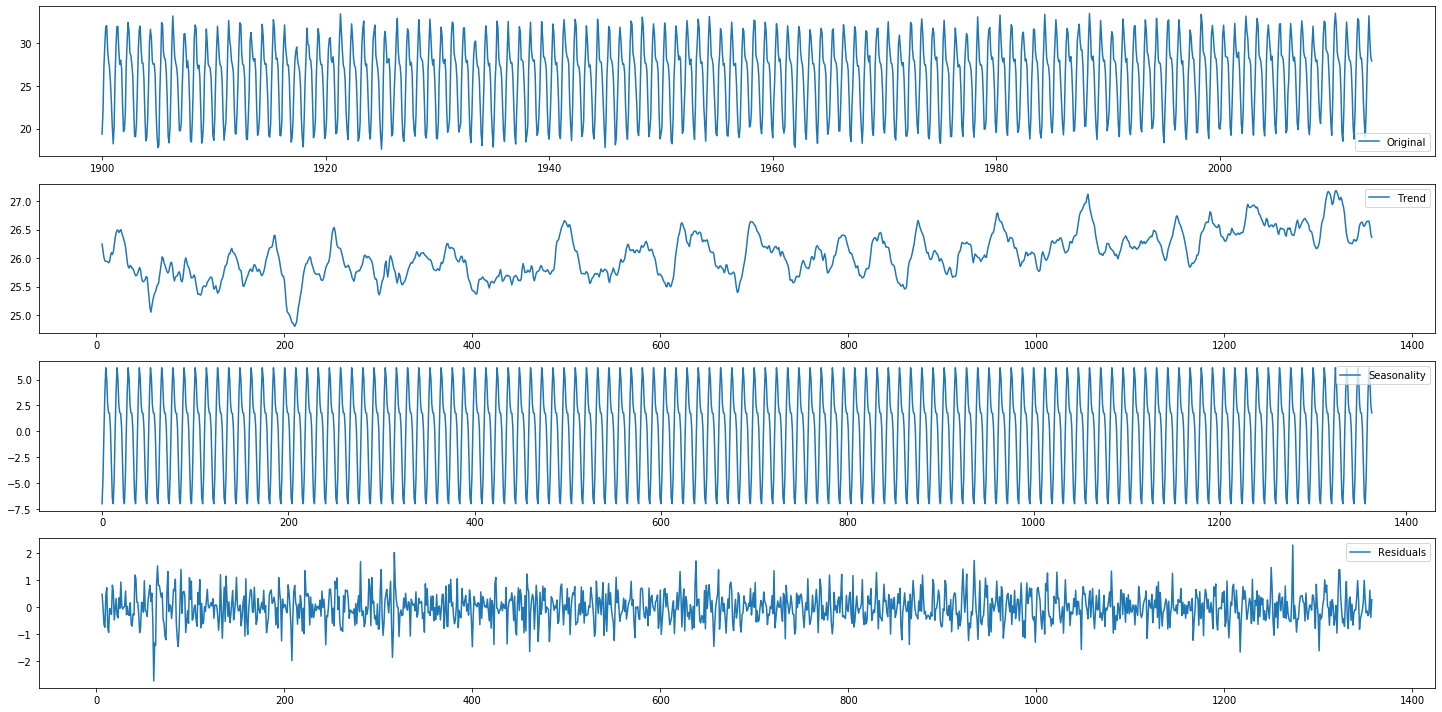

In [109]:
plt.subplot(411) 
plt.plot(Y1, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

There is a clear trend seen as expected, and also seasonality of 12 (months) is observed.

In [110]:
# removing trend

Y1_diff = Y1 - Y1.shift(1)

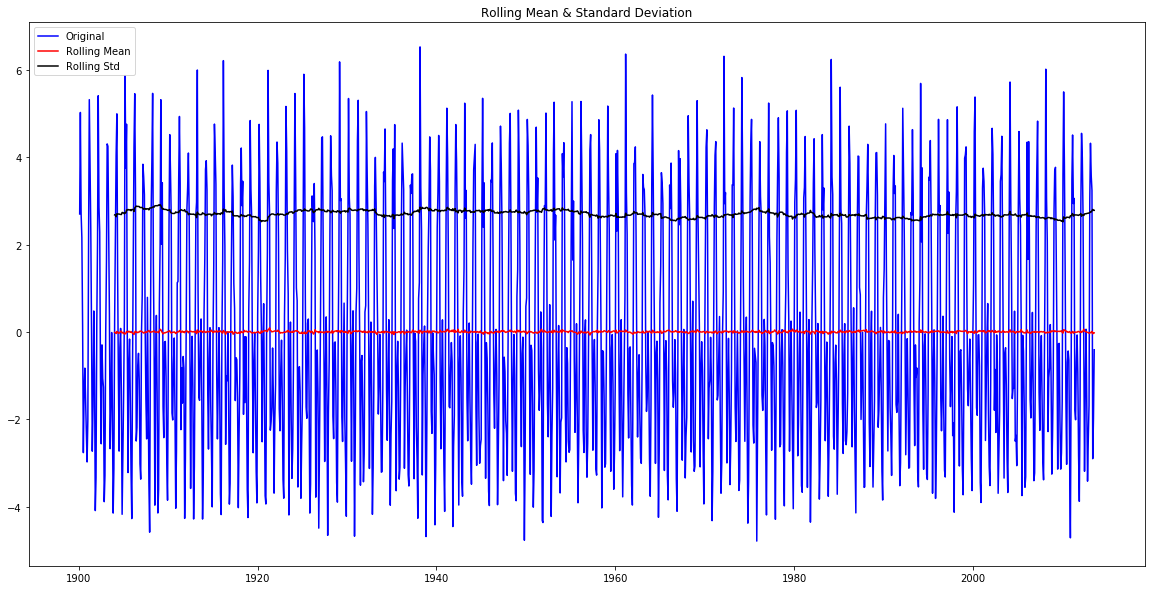

Results of Dickey-Fuller Test:
Test Statistic                -1.595918e+01
p-value                        7.210705e-29
#Lags Used                     2.200000e+01
Number of Observations Used    1.340000e+03
Critical Value (1%)           -3.435239e+00
Critical Value (5%)           -2.863699e+00
Critical Value (10%)          -2.567920e+00
dtype: float64


In [112]:
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
stationarity_check(Y1_diff.dropna())

Now the test statistic is really less than critical value.
Let's confirm that the trend has vanished by decompsition.

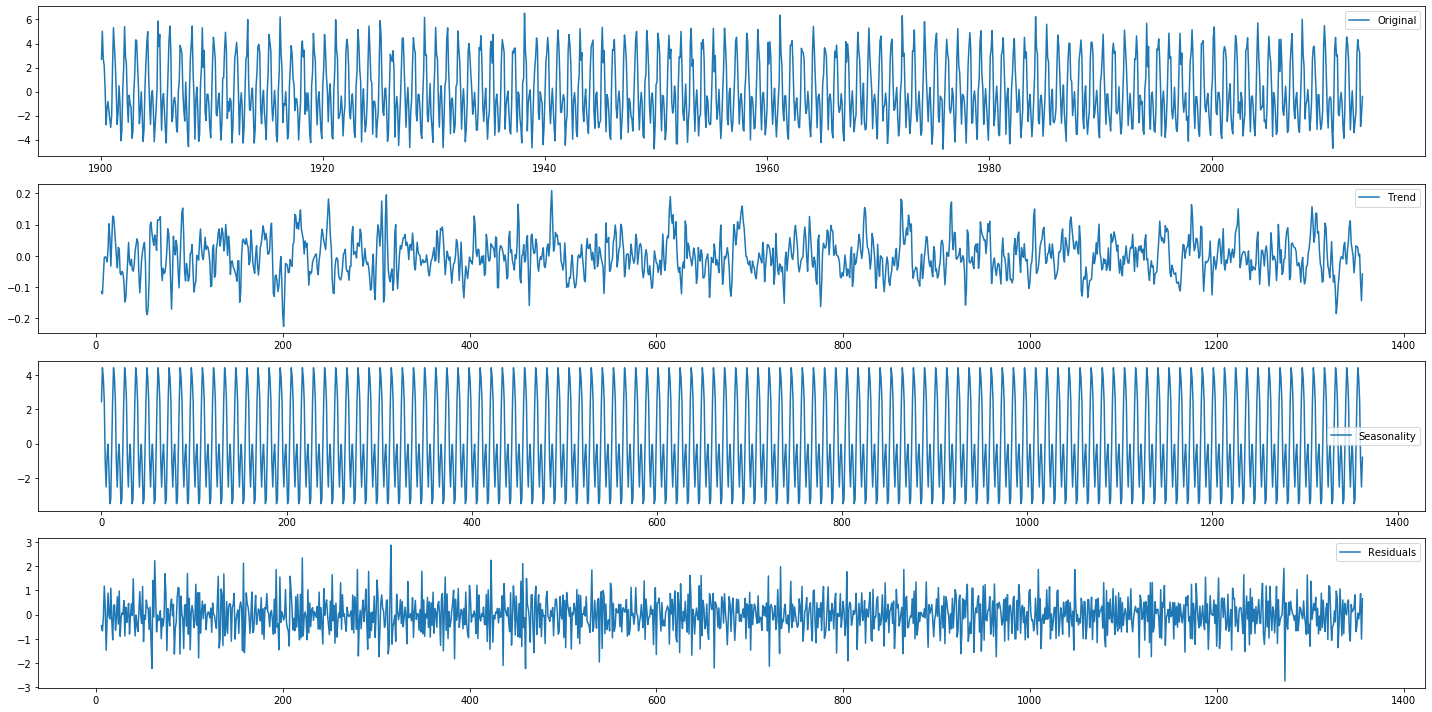

In [113]:
decomposition = seasonal_decompose(pd.DataFrame(Y1_diff.dropna()).AverageTemperature.values, freq = 12) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid

plt.subplot(411) 
plt.plot(Y1_diff, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

In [114]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(Y1_diff.dropna(), nlags=80)                          # check upto 80 past datapoints
lag_pacf = pacf(Y1_diff.dropna(), nlags=80, method='ols')

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


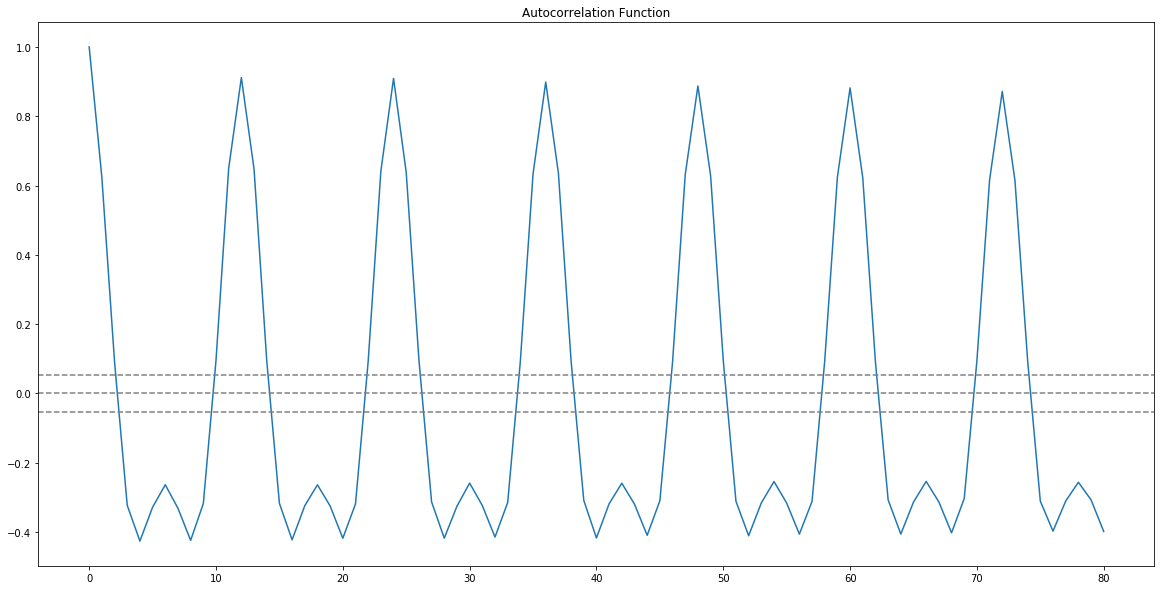

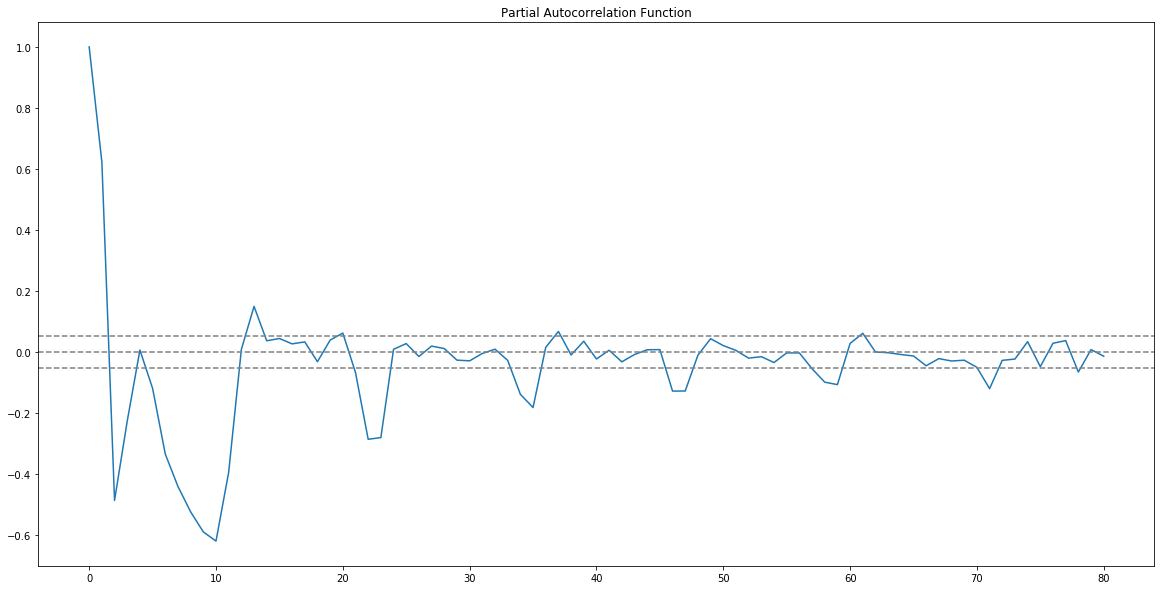

In [115]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(Y1_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(Y1_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(Y1_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(Y1_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

As we see, every 12th value after any value choosen has a very high correlation with that value. Hence, there is a huge seasonality trend as expected.

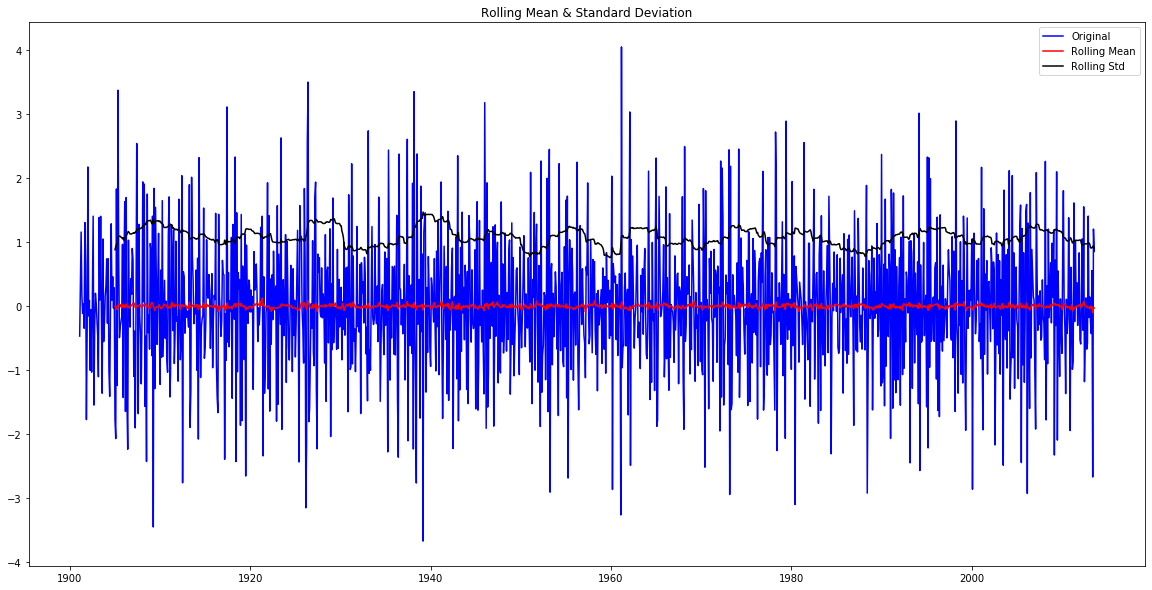

Results of Dickey-Fuller Test:
Test Statistic                -1.271698e+01
p-value                        1.001568e-23
#Lags Used                     2.400000e+01
Number of Observations Used    1.326000e+03
Critical Value (1%)           -3.435291e+00
Critical Value (5%)           -2.863722e+00
Critical Value (10%)          -2.567932e+00
dtype: float64


In [118]:
Y1_seas_diff = Y1_diff - Y1_diff.shift(12)
stationarity_check(Y1_seas_diff.dropna())

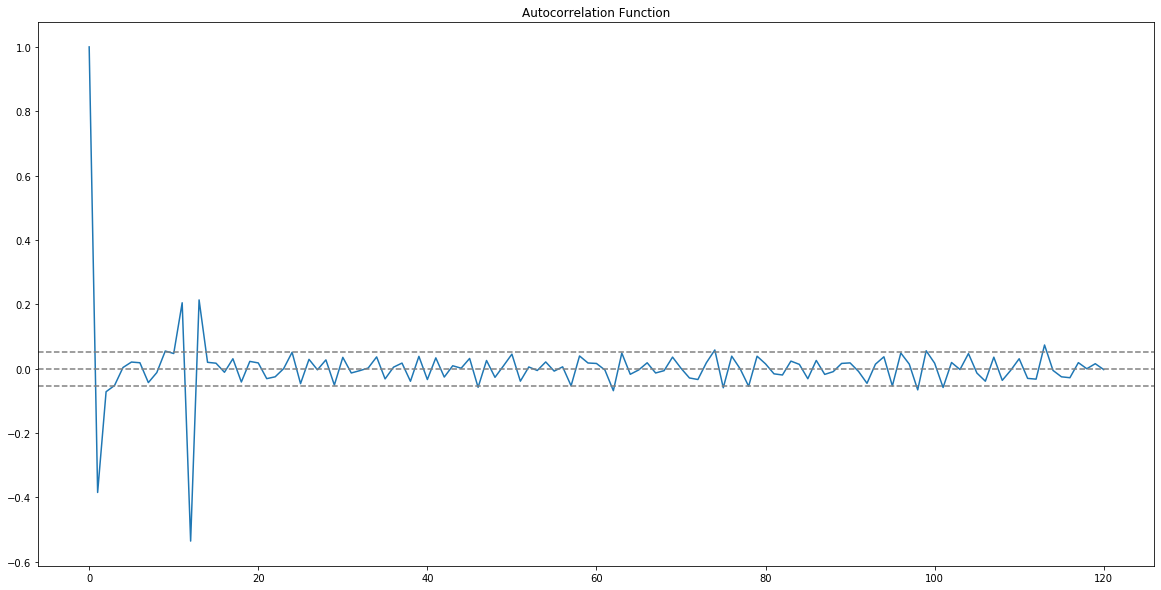

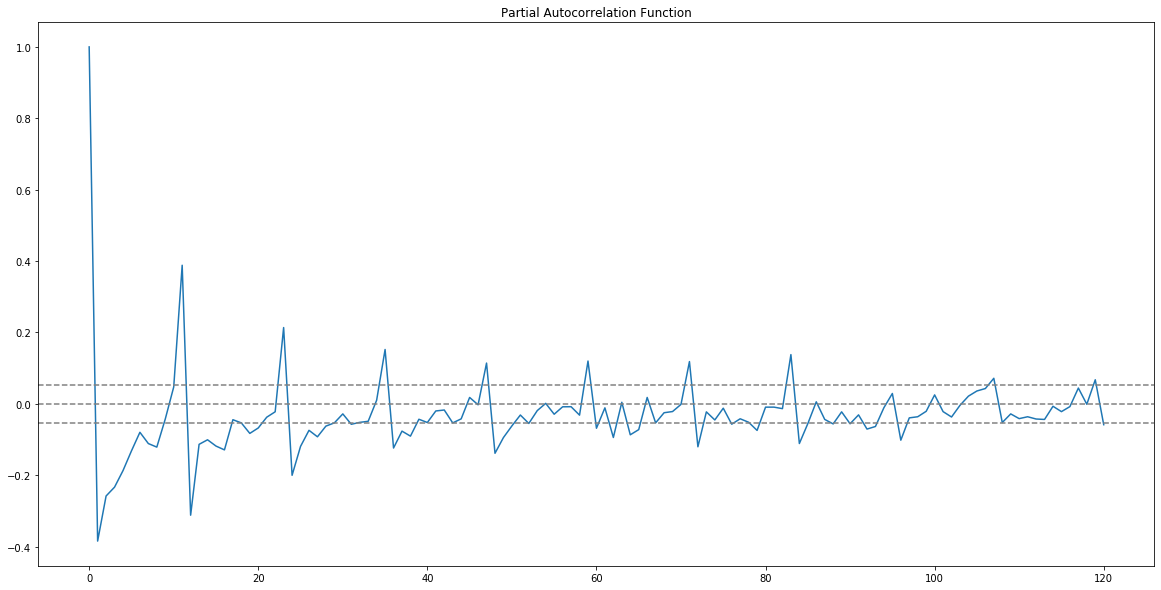

In [120]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(Y1_seas_diff.dropna(), nlags=120)                          # check upto 80 past datapoints
lag_pacf = pacf(Y1_seas_diff.dropna(), nlags=120, method='ols')

plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(Y1_seas_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(Y1_seas_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(Y1_seas_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(Y1_seas_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

p = 8
d = 1
q = 4
P = 8
D = 1
Q = 2
S = 12

In [144]:
Y1_new  = Y1.dropna().reset_index()
Y1_new = Y1_new.drop('dt', axis = 1)
Y1_new

,AverageTemperature
0,19.350429
1,22.049214
2,27.072214
3,29.774000
4,31.935714
...,...
1359,29.988429
1360,33.227786
1361,30.324357
1362,28.340786


In [145]:
# Let's predict upto 2030

import statsmodels.api as sm 
fit1 = sm.tsa.statespace.SARIMAX(Y1_new, order=(8, 1, 4),seasonal_order=(8,1,2,12)).fit() 
ts = fit1.forecast(steps = 210)
y_hat_avg = pd.DataFrame(ts, columns = ['SARIMA'], index = list(range(1364, 1574)))
y_hat_avg

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,SARIMA
1364,28.111680
1365,26.713634
1366,23.511850
1367,20.036367
1368,19.498754
...,...
1569,26.983218
1570,23.757511
1571,20.453597
1572,19.637127


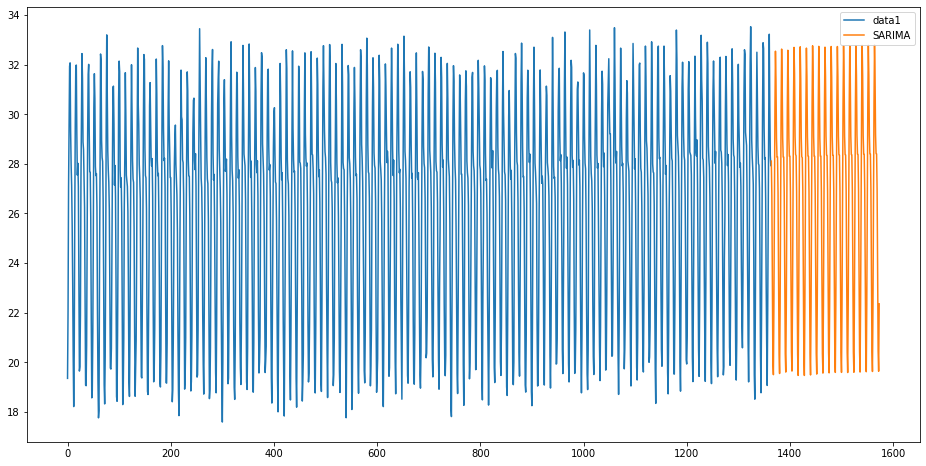

In [146]:
plt.figure(figsize=(16,8)) 
plt.plot(Y1_new, label='data1')  
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

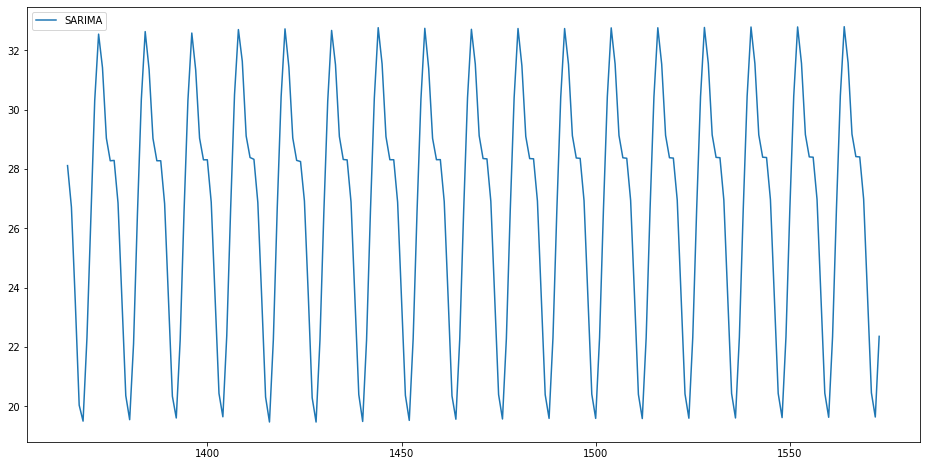

In [147]:
plt.figure(figsize=(16,8)) 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

We see a slight upward trend and a season of 12 months as expected.

What remains is converting the dataframe index to Datetime format.

Next : extract avg temps for various countries and compare the data...analyze to find which country has manage to temp in control.
Then average over all countries to find gloabl avg temp over the years, and predict the future temp based on global warming.